# Create annotation visualization from one video

In [1]:
from ai_badminton.pose import read_player_poses
from ai_badminton.court import read_court, court_points_to_corners, Court
from ai_badminton.trajectory import Trajectory
from ai_badminton.video_annotator import annotate_video
from ai_badminton.hit_detector import read_hits

import cv2

import numpy as np
from pathlib import Path

## Read different data

In [6]:
dataset_root = "/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset"
prefix_template = dataset_root + "/match1/%s/1_01_00"

poses = read_player_poses(prefix_template %("poses"))

court_pts = read_court((prefix_template %("court")) + ".out")
court = Court(corners = court_points_to_corners(court_pts))

trajectory = Trajectory((prefix_template %("ball_trajectory")) + "_ball.csv")

hits_path = Path((prefix_template %("shot")) + "_hit_predict.csv")
result, is_hit = read_hits(hits_path)

video_file = (prefix_template %("rally_video")) + ".mp4"
cap = cv2.VideoCapture(video_file)
assert cap.isOpened(), f"Cannot open video {video_file}"

In [8]:
annotate_video(cap, court, poses, trajectory, result=result, is_hit=is_hit, outfile="./test.mp4")

  0%|          | 0/651 [00:00<?, ?it/s]

# Create annotation visualization from all video with 3d trajectory

In [2]:
from ai_badminton.pose import read_player_poses
from ai_badminton.court import read_court, court_points_to_corners, Court
from ai_badminton.trajectory import Trajectory, read_trajectory_3d
from ai_badminton.video_annotator import annotate_video_3d
from ai_badminton.hit_detector import read_hits
from ai_badminton.pipeline_clean import read_poses_court_trajectory

import cv2

import numpy as np
from pathlib import Path

match_path = Path("/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp")

rally_videos = (match_path / "rally_video").glob("*.mp4")
video_names = [p.stem for p in rally_videos]

for video_name in video_names:


    video_path = match_path / "rally_video" / (video_name + ".mp4")

    cap = cv2.VideoCapture(str(video_path))
    assert cap.isOpened()

    trajectory_3d_path = match_path / "ball_trajectory_3d" / (video_path.stem + "_3d.csv")
    print(trajectory_3d_path)
    assert trajectory_3d_path.is_file()

    metadata = read_poses_court_trajectory(match_path, video_path.stem)
    output_path = match_path / "annotated_3d" / (video_path.stem + "_3d.mp4")
    output_path.parent.mkdir(parents=True, exist_ok=True)
    annotate_video_3d(
        cap,
        metadata["court3d"],
        read_trajectory_3d(trajectory_3d_path),
        outfile = str(output_path)
    )
    print("Done")


/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/ball_trajectory_3d/1_01_00_3d.csv
603


  0%|          | 0/603 [00:00<?, ?it/s]

/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/ball_trajectory_3d/1_02_04_3d.csv
67


  0%|          | 0/67 [00:00<?, ?it/s]

/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/ball_trajectory_3d/1_02_03_3d.csv
54


  0%|          | 0/54 [00:00<?, ?it/s]

/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/ball_trajectory_3d/1_03_06_3d.csv
184


  0%|          | 0/184 [00:00<?, ?it/s]

/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/ball_trajectory_3d/1_02_02_3d.csv
161


  0%|          | 0/161 [00:00<?, ?it/s]

/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/ball_trajectory_3d/1_02_01_3d.csv
151


  0%|          | 0/151 [00:00<?, ?it/s]

/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/ball_trajectory_3d/1_06_09_3d.csv
422


  0%|          | 0/422 [00:00<?, ?it/s]

/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/ball_trajectory_3d/1_03_05_3d.csv
336


  0%|          | 0/336 [00:00<?, ?it/s]

/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/ball_trajectory_3d/1_06_08_3d.csv
47


  0%|          | 0/47 [00:00<?, ?it/s]

/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/ball_trajectory_3d/1_06_06_3d.csv
105


  0%|          | 0/105 [00:00<?, ?it/s]

/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/ball_trajectory_3d/1_02_00_3d.csv
453


  0%|          | 0/453 [00:00<?, ?it/s]

/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/ball_trajectory_3d/1_03_04_3d.csv
86


  0%|          | 0/86 [00:00<?, ?it/s]

# Create annotation visualization from all videos in a match

In [32]:
def annotate_all_videos(match_path):
    rally_videos = (match_path / "rally_video").glob("*.mp4")
    video_names = [p.stem for p in rally_videos]
    
    for video_name in video_names:
        print(f"Processing video: {video_name}")
        poses = read_player_poses(str(match_path / "poses" / video_name))
        
        court_pts = read_court(str(match_path / "court" / (video_name + ".out")))
        court = Court(corners = court_points_to_corners(court_pts))

        trajectory = Trajectory(str(match_path / "ball_trajectory" / (str(video_name) + "_ball_predict.csv")))

        video_file = str(match_path / "rally_video" / (video_name + ".mp4"))
            
        cap = cv2.VideoCapture(video_file)
        assert cap.isOpened(), f"Cannot open video {video_file}"
        
        out_dir = match_path / "annotated_2d"
        out_dir.mkdir(parents=True, exist_ok=True)
        out_path = out_dir / (video_name + ".mp4")
        annotate_video(cap, court, poses, trajectory, outfile=str(out_path))


In [34]:
annotate_all_videos(Path("/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match1_cp/"))

Processing video: 1_01_00


  0%|          | 0/651 [00:00<?, ?it/s]

Processing video: 1_02_04


  0%|          | 0/153 [00:00<?, ?it/s]

Processing video: 1_02_03


  0%|          | 0/78 [00:00<?, ?it/s]

Processing video: 1_03_06


  0%|          | 0/249 [00:00<?, ?it/s]

Processing video: 1_02_02


  0%|          | 0/258 [00:00<?, ?it/s]

Processing video: 1_02_01


  0%|          | 0/195 [00:00<?, ?it/s]

Processing video: 1_06_09


  0%|          | 0/453 [00:00<?, ?it/s]

Processing video: 1_03_05


  0%|          | 0/357 [00:00<?, ?it/s]

Processing video: 1_06_08


  0%|          | 0/99 [00:00<?, ?it/s]

Processing video: 1_06_06


  0%|          | 0/156 [00:00<?, ?it/s]

Processing video: 1_02_00


  0%|          | 0/498 [00:00<?, ?it/s]

Processing video: 1_03_04


  0%|          | 0/138 [00:00<?, ?it/s]

# Visualize the inferenced hits versus ground truth

In [3]:
%matplotlib widget

import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [19]:
def plot_shot_differences(hit_groundtruth_path):
    gt_path = hit_groundtruth_path
    pred_path = Path(str(gt_path.with_suffix("")) + "_predict.csv")
    assert gt_path.is_file() and pred_path.is_file()
    
    gt = pd.read_csv(str(gt_path))
    pred = pd.read_csv(str(pred_path))
    
    plt.figure()
    plt.plot(gt.values[:,1], 'o', label="ground truth")
    plt.plot((pred.values[:,1]>0), 'x', label="prediction")
    plt.legend(loc=0)
    plt.show()
    
    

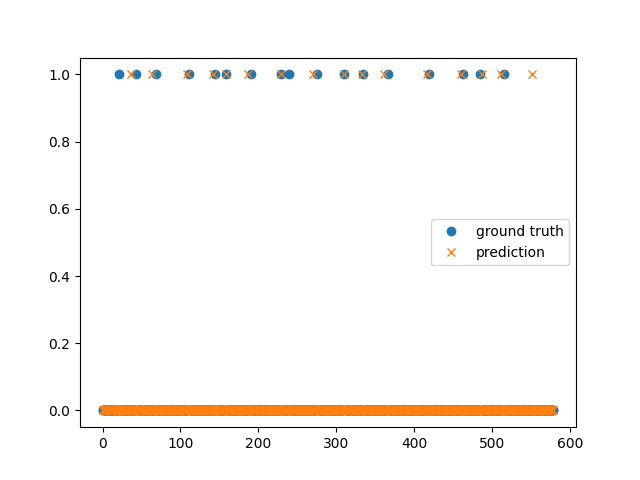

In [21]:

plot_shot_differences(Path("/home/juiwang/ai-badminton/data/tracknetv2_042022/profession_dataset/match10/shot/1_03_01_hit.csv"))